In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from pymatgen.core import Lattice, Structure, Composition
from pymatgen.vis.structure_vtk import StructureVis
from pymatgen.transformations import standard_transformations, site_transformations

In [284]:
a = 14.43523963
b = 6.74280580
c = 10.42107312

beta = np.deg2rad(122.18778465)  # conventional a and c angle
angle_D1_a = np.deg2rad(11.35)
angle_D2_a = angle_D1_a + np.pi / 2
angle_D1_c = angle_D1_a - beta
angle_D2_c = angle_D2_a - beta
T_dielectric_from_conventional = np.array(
    [
        [np.cos(angle_D1_a), 0, np.cos(angle_D1_c)],
        [np.cos(angle_D2_a), 0, np.cos(angle_D2_c)],
        [0, -1, 0],  # the minus sign here keeps the handness of the coordinate system.
    ],
)
T_conventional_from_dielectric = np.linalg.inv(T_dielectric_from_conventional)

In [285]:
def transform(T, x, y, z):
    return tuple(
        [T[kk][0] * x + T[kk][1] * y + T[kk][2] * z for kk in range(3)]
    )

In [286]:
conventional_structure = Structure.from_file("Y2SiO5-mp3520.cif")
for s in conventional_structure.sites:
    for kk in s.species._data:
        s.species._data[kk] = int(s.species._data[kk])  # fix a bug in pymatgen visualization

sites_1 = {}
for kk, s in enumerate(conventional_structure.sites):
    if s.species_string == "Y3+":
        max_bond_distance = 2.9  # 2.7 to 3.1 gives the correct numbers of neighbors (7 / 6).
        if len(conventional_structure.get_neighbors(s, max_bond_distance)) == 7:
            sites_1[kk] = "Eu3+"
conventional_structure = site_transformations.ReplaceSiteSpeciesTransformation(sites_1).apply_transformation(conventional_structure)
conventional_atoms = []
conventional_a = []
conventional_b = []
conventional_c = []
for s in conventional_structure.sites:
    conventional_atoms.append(s.species_string)
    conventional_a.append(s.a * a)
    conventional_b.append(s.b * b)
    conventional_c.append(s.c * c)
for s in conventional_structure.sites:  # amplify 
    conventional_atoms.append(s.species_string)
    conventional_a.append(s.a * a + a)
    conventional_b.append(s.b * b)
    conventional_c.append(s.c * c)
    

conventional_atoms = np.array(conventional_atoms)
conventional_a = np.array(conventional_a) - np.average(conventional_a)
conventional_b = np.array(conventional_b) - np.average(conventional_b)
conventional_c = np.array(conventional_c) - np.average(conventional_c)

conventional_D1, conventional_D2, conventional_Db = transform(
    T_dielectric_from_conventional, conventional_a, conventional_b, conventional_c,
)

# conventional_atoms = []
# conventional_D1 = []
# conventional_D2 = []
# conventional_Db = []
# for s in conventional_structure.sites:
#     conventional_atoms.append(s.species_string)
#     conventional_D1.append(s.coords[0])
#     conventional_D2.append(s.coords[2])
#     conventional_Db.append(-s.coords[1])
# conventional_atoms = np.array(conventional_atoms)
# conventional_D1 = np.array(conventional_D1) - np.average(conventional_D1)
# conventional_D2 = np.array(conventional_D2) - np.average(conventional_D2)
# conventional_Db = np.array(conventional_Db) - np.average(conventional_Db)

conventional_Eu_mask = conventional_atoms == "Eu3+"
conventional_Y_mask = conventional_atoms == "Y3+"
conventional_Si_mask = conventional_atoms == "Si4+"
conventional_O_mask = conventional_atoms == "O2-"

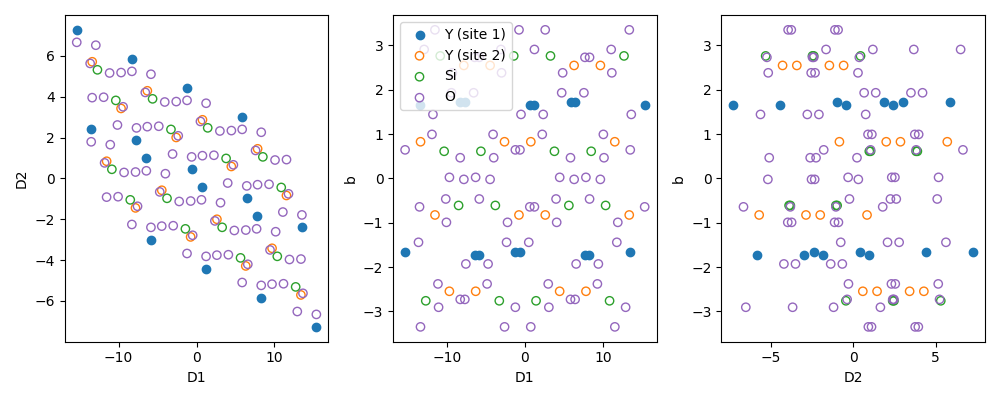

In [287]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].scatter(conventional_D1[conventional_Eu_mask], conventional_D2[conventional_Eu_mask], color="C0")
ax[0].scatter(conventional_D1[conventional_Y_mask], conventional_D2[conventional_Y_mask], edgecolor="C1", facecolor="none")
ax[0].scatter(conventional_D1[conventional_Si_mask], conventional_D2[conventional_Si_mask], edgecolor="C2", facecolor="none")
ax[0].scatter(conventional_D1[conventional_O_mask], conventional_D2[conventional_O_mask], edgecolor="C4", facecolor="none")
ax[0].set_xlabel("D1")
ax[0].set_ylabel("D2")

ax[1].scatter(conventional_D1[conventional_Eu_mask], conventional_Db[conventional_Eu_mask], label="Y (site 1)", color="C0")
ax[1].scatter(conventional_D1[conventional_Y_mask], conventional_Db[conventional_Y_mask], label="Y (site 2)", edgecolor="C1", facecolor="none")
ax[1].scatter(conventional_D1[conventional_Si_mask], conventional_Db[conventional_Si_mask], label="Si", edgecolor="C2", facecolor="none")
ax[1].scatter(conventional_D1[conventional_O_mask], conventional_Db[conventional_O_mask], label="O", edgecolor="C4", facecolor="none")
ax[1].set_xlabel("D1")
ax[1].set_ylabel("b")
ax[1].legend()

ax[2].scatter(conventional_D2[conventional_Eu_mask], conventional_Db[conventional_Eu_mask], color="C0")
ax[2].scatter(conventional_D2[conventional_Y_mask], conventional_Db[conventional_Y_mask], edgecolor="C1", facecolor="none")
ax[2].scatter(conventional_D2[conventional_Si_mask], conventional_Db[conventional_Si_mask], edgecolor="C2", facecolor="none")
ax[2].scatter(conventional_D2[conventional_O_mask], conventional_Db[conventional_O_mask], edgecolor="C4", facecolor="none")
ax[2].set_xlabel("D2")
ax[2].set_ylabel("b")

plt.tight_layout()
plt.show()

In [288]:
primitive_structure = conventional_structure.get_primitive_structure()
primitive_atoms = []
primitive_x = []
primitive_y = []
primitive_z = []
for kk, s in enumerate(primitive_structure.sites):
    primitive_atoms.append(s.species_string)
    primitive_x.append(s.coords[0])
    primitive_y.append(s.coords[1])
    primitive_z.append(s.coords[2])

primitive_atoms = np.array(primitive_atoms)
primitive_x = np.array(primitive_x) - np.average(primitive_x)
primitive_y = np.array(primitive_y) - np.average(primitive_y)
primitive_z = np.array(primitive_z) - np.average(primitive_z)

primitive_Eu_mask = primitive_atoms == "Eu3+"
primitive_Y_mask = primitive_atoms == "Y3+"
primitive_Si_mask = primitive_atoms == "Si4+"
primitive_O_mask = primitive_atoms == "O2-"

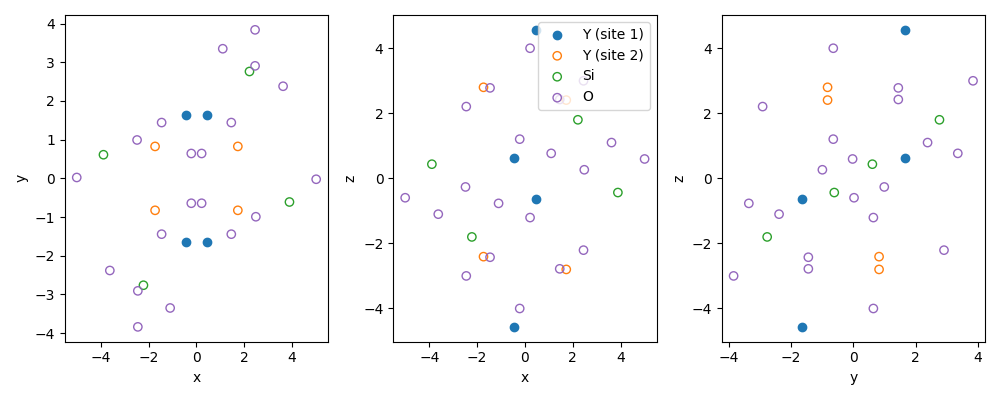

In [289]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].scatter(primitive_x[primitive_Eu_mask], primitive_y[primitive_Eu_mask], color="C0")
ax[0].scatter(primitive_x[primitive_Y_mask], primitive_y[primitive_Y_mask], edgecolor="C1", facecolor="none")
ax[0].scatter(primitive_x[primitive_Si_mask], primitive_y[primitive_Si_mask], edgecolor="C2", facecolor="none")
ax[0].scatter(primitive_x[primitive_O_mask], primitive_y[primitive_O_mask], edgecolor="C4", facecolor="none")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].scatter(primitive_x[primitive_Eu_mask], primitive_z[primitive_Eu_mask], label="Y (site 1)", color="C0")
ax[1].scatter(primitive_x[primitive_Y_mask], primitive_z[primitive_Y_mask], label="Y (site 2)", edgecolor="C1", facecolor="none")
ax[1].scatter(primitive_x[primitive_Si_mask], primitive_z[primitive_Si_mask], label="Si", edgecolor="C2", facecolor="none")
ax[1].scatter(primitive_x[primitive_O_mask], primitive_z[primitive_O_mask], label="O", edgecolor="C4", facecolor="none")
ax[1].set_xlabel("x")
ax[1].set_ylabel("z")
ax[1].legend()

ax[2].scatter(primitive_y[primitive_Eu_mask], primitive_z[primitive_Eu_mask], color="C0")
ax[2].scatter(primitive_y[primitive_Y_mask], primitive_z[primitive_Y_mask], edgecolor="C1", facecolor="none")
ax[2].scatter(primitive_y[primitive_Si_mask], primitive_z[primitive_Si_mask], edgecolor="C2", facecolor="none")
ax[2].scatter(primitive_y[primitive_O_mask], primitive_z[primitive_O_mask], edgecolor="C4", facecolor="none")
ax[2].set_xlabel("y")
ax[2].set_ylabel("z")

plt.tight_layout()
plt.show()

In [292]:
vec_xyz = np.array([primitive_x[0], primitive_y[0], primitive_z[0]])
conventional_index = 0
vec_D1D2Db = np.array([conventional_D1[conventional_index], conventional_D2[conventional_index], conventional_Db[conventional_index]])
T_primitive_to_dielectric = get_rotation_matrix(vec_xyz, vec_D1D2Db)
    

def get_rotation_matrix(v1, v2):
    v1_unit = v1 / np.linalg.norm(v1)
    v2_unit = v2 / np.linalg.norm(v2)
    v = np.cross(v1_unit, v2_unit)
    s = np.linalg.norm(v)
    c = v1_unit @ v2_unit
    m = np.array(  # skew_symmetric_cross_product_v
        [
            [0, -v[2], v[1]],
            [v[2], 0, -v[0]],
            [-v[1], v[0], 0]
        ]
    )
    return np.identity(3) + m + m @ m * (1 - c) / s**2

T_primitive_to_dielectric = get_rotation_matrix(vec_xyz, vec_D1D2Db)
T_dielectric_to_primitive = np.linalg.inv(T_primitive_to_dielectric)
primitive_D1, primitive_D2, primitive_Db = transform(
    T_primitive_to_dielectric, primitive_x, primitive_y, primitive_z,
)

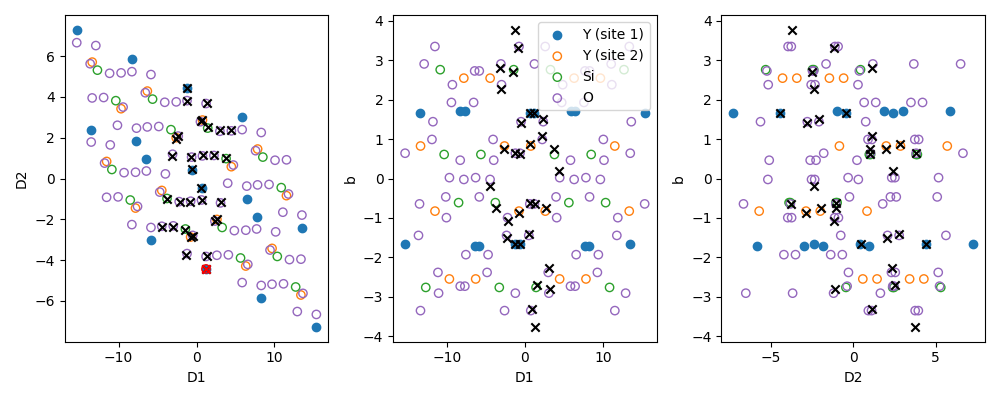

In [294]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].scatter(conventional_D1[conventional_Eu_mask], conventional_D2[conventional_Eu_mask], color="C0")
ax[0].scatter(conventional_D1[conventional_Y_mask], conventional_D2[conventional_Y_mask], edgecolor="C1", facecolor="none")
ax[0].scatter(conventional_D1[conventional_Si_mask], conventional_D2[conventional_Si_mask], edgecolor="C2", facecolor="none")
ax[0].scatter(conventional_D1[conventional_O_mask], conventional_D2[conventional_O_mask], edgecolor="C4", facecolor="none")
ax[0].scatter(primitive_D1, primitive_D2, color="k", marker="x")
ax[0].scatter(primitive_D1[0], primitive_D2[0], color="red", marker="x")  # ion used for matching the coordinates.
ax[0].scatter(conventional_D1[conventional_index], conventional_D2[conventional_index], color="red", marker="o", facecolor="none")  # ion used for matching the coordinates.
ax[0].set_xlabel("D1")
ax[0].set_ylabel("D2")

ax[1].scatter(conventional_D1[conventional_Eu_mask], conventional_Db[conventional_Eu_mask], label="Y (site 1)", color="C0")
ax[1].scatter(conventional_D1[conventional_Y_mask], conventional_Db[conventional_Y_mask], label="Y (site 2)", edgecolor="C1", facecolor="none")
ax[1].scatter(conventional_D1[conventional_Si_mask], conventional_Db[conventional_Si_mask], label="Si", edgecolor="C2", facecolor="none")
ax[1].scatter(conventional_D1[conventional_O_mask], conventional_Db[conventional_O_mask], label="O", edgecolor="C4", facecolor="none")
ax[1].scatter(primitive_D1, primitive_Db, color="k", marker="x")
ax[1].set_xlabel("D1")
ax[1].set_ylabel("b")
ax[1].legend()

ax[2].scatter(conventional_D2[conventional_Eu_mask], conventional_Db[conventional_Eu_mask], color="C0")
ax[2].scatter(conventional_D2[conventional_Y_mask], conventional_Db[conventional_Y_mask], edgecolor="C1", facecolor="none")
ax[2].scatter(conventional_D2[conventional_Si_mask], conventional_Db[conventional_Si_mask], edgecolor="C2", facecolor="none")
ax[2].scatter(conventional_D2[conventional_O_mask], conventional_Db[conventional_O_mask], edgecolor="C4", facecolor="none")
ax[2].scatter(primitive_D2, primitive_Db, color="k", marker="x")
ax[2].set_xlabel("D2")
ax[2].set_ylabel("b")

plt.tight_layout()
plt.show()

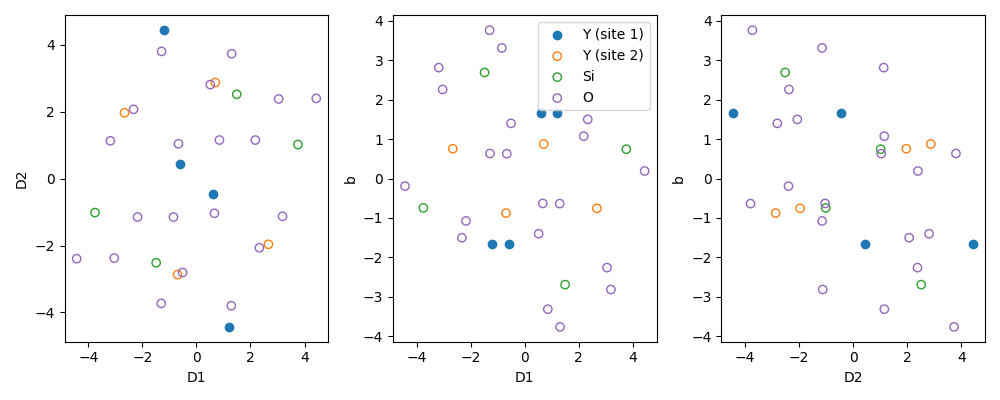

In [297]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].scatter(primitive_D1[primitive_Eu_mask], primitive_D2[primitive_Eu_mask], color="C0")
ax[0].scatter(primitive_D1[primitive_Y_mask], primitive_D2[primitive_Y_mask], edgecolor="C1", facecolor="none")
ax[0].scatter(primitive_D1[primitive_Si_mask], primitive_D2[primitive_Si_mask], edgecolor="C2", facecolor="none")
ax[0].scatter(primitive_D1[primitive_O_mask], primitive_D2[primitive_O_mask], edgecolor="C4", facecolor="none")
ax[0].set_xlabel("D1")
ax[0].set_ylabel("D2")

ax[1].scatter(primitive_D1[primitive_Eu_mask], primitive_Db[primitive_Eu_mask], label="Y (site 1)", color="C0")
ax[1].scatter(primitive_D1[primitive_Y_mask], primitive_Db[primitive_Y_mask], label="Y (site 2)", edgecolor="C1", facecolor="none")
ax[1].scatter(primitive_D1[primitive_Si_mask], primitive_Db[primitive_Si_mask], label="Si", edgecolor="C2", facecolor="none")
ax[1].scatter(primitive_D1[primitive_O_mask], primitive_Db[primitive_O_mask], label="O", edgecolor="C4", facecolor="none")
ax[1].set_xlabel("D1")
ax[1].set_ylabel("b")
ax[1].legend()

ax[2].scatter(primitive_D2[primitive_Eu_mask], primitive_Db[primitive_Eu_mask], color="C0")
ax[2].scatter(primitive_D2[primitive_Y_mask], primitive_Db[primitive_Y_mask], edgecolor="C1", facecolor="none")
ax[2].scatter(primitive_D2[primitive_Si_mask], primitive_Db[primitive_Si_mask], edgecolor="C2", facecolor="none")
ax[2].scatter(primitive_D2[primitive_O_mask], primitive_Db[primitive_O_mask], edgecolor="C4", facecolor="none")
ax[2].set_xlabel("D2")
ax[2].set_ylabel("b")

plt.tight_layout()
plt.show()